# **Water quality Dataset**
Predict if the water is safe or not

In [2]:
#Import the drive module from Google Colab to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import the pandas library for data manipulation
import pandas as pd

#Read the CSV file from your Google Drive into a pandas DataFrame
dataset = pd.read_csv("/content/drive/MyDrive/waterQuality1.csv")
print(dataset)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01   10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

# **Label Encoding Categorical Data**

In [4]:
#Import the LabelEncoder from scikit-learn to convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

#Convert ammonia column to numerical format using LabelEncoder
dataset['ammonia'] = Le.fit_transform(dataset['ammonia'])

# **Separating Target Variable and Features**

In [5]:
#Separate the target variable 'is_safe' and the features
Y = dataset['is_safe']
X = dataset.drop(['is_safe'],axis=1)
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,2476,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,1222,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,526,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,307,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,1511,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,2362,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,1500,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,2285,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,194,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


# **Splitting and Normalization of data**

In [6]:
#Import necessary libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#Encode the target variable 'is_safe' into numerical format
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test= train_test_split(X.values,Y, test_size=0.2, random_state= 42)

#Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **K-Nearest Neighbour Classifier**

K-Nearest Neighbour Classifier Accuracy: 0.89125
K-Nearest Neighbour Classifier AUC Score: 0.8578392857142857
K-Nearest Neighbour Classifier Precision Score: 0.8944658944658944
K-Nearest Neighbour Classifier Recall Score: 0.9928571428571429
K-Nearest Neighbour Classifier F1 Score: 0.941096817874069


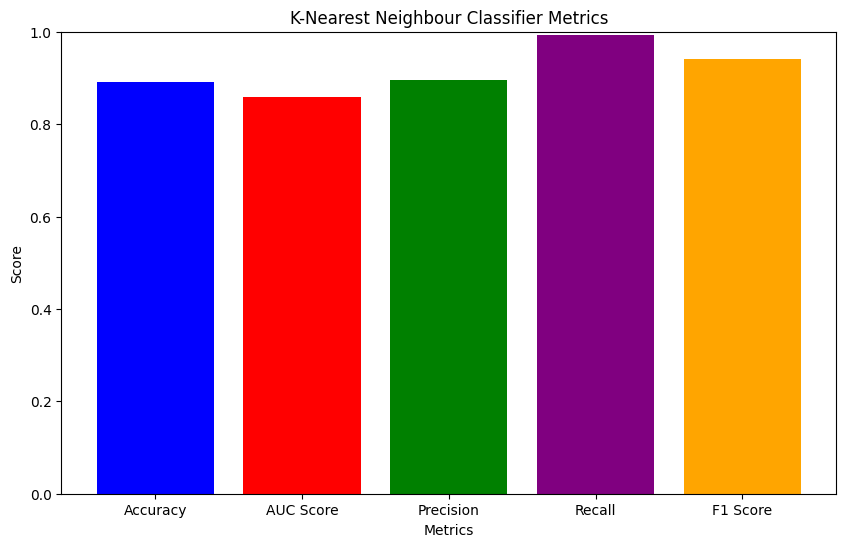

In [7]:
#Import necessary libraries for visualization and model training
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc

#Create a KNN classifier with k=6 neighbors
classifier = KNeighborsClassifier(n_neighbors=6)

#Train the KNN classifier on the training data
classifier.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)


#Calculate the evaluation metrics for the KNN classifier
knn_accuracy = accuracy_score(Y_test, y_pred)
y_scores = classifier.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1], pos_label=1)
Knn_auc = auc(fpr, tpr)
knn_precision = precision_score(Y_test, y_pred)
knn_recall = recall_score(Y_test, y_pred)
knn_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the KNN classifier
print(f"K-Nearest Neighbour Classifier Accuracy: {knn_accuracy}")
print(f"K-Nearest Neighbour Classifier AUC Score: {Knn_auc}")
print(f"K-Nearest Neighbour Classifier Precision Score: {knn_precision}")
print(f"K-Nearest Neighbour Classifier Recall Score: {knn_recall}")
print(f"K-Nearest Neighbour Classifier F1 Score: {knn_f1}")

#Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

#Create a list of corresponding metric values
#accuracy, auc_score, precision, recall, and f1 are already calculated
values = [knn_accuracy,Knn_auc,knn_precision,knn_recall,knn_f1]

plt.figure(figsize=(10, 6))

#Create a bar plot with the metrics on the x-axis and their corresponding values on the y-axis
#Each bar is colored differently for better visualization
plt.bar(metrics, values, color=['blue', 'red', 'green', 'purple', 'orange'])

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('K-Nearest Neighbour Classifier Metrics')
#Set the y-axis limits between 0 and 1 to better visualize the scores
plt.ylim(0.0, 1.0)
plt.show()

# **Decision tree learning**

Decision Tree Accuracy: 0.95875
Decision Tree AUC Score: 0.9065464285714286
Decision Tree Precision Score: 0.9598042929292929
Decision Tree Recall Score: 0.95875
Decision Tree F1 Score: 0.9592744974874372


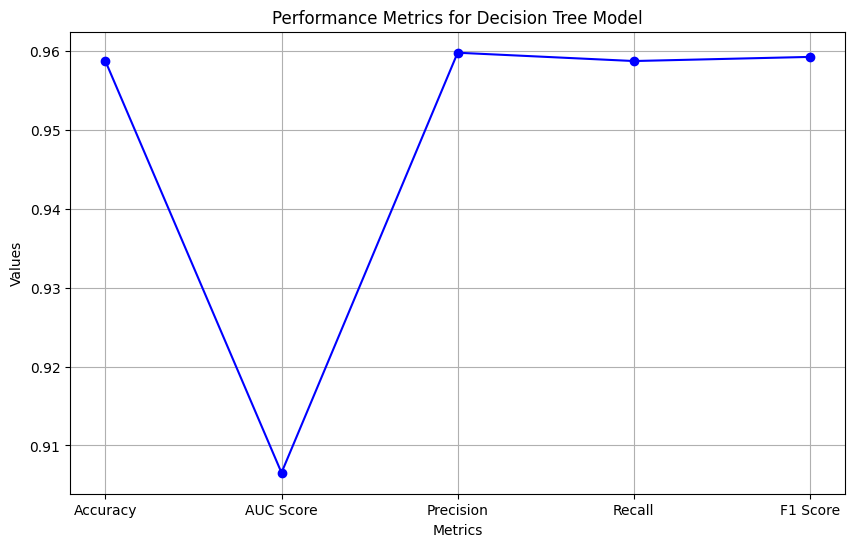

In [8]:
#Import the DecisionTreeClassifier from the sklearn.tree module
from sklearn import tree

#Create a Decision Tree Classifier with entropy as the criterion
Classifier = tree.DecisionTreeClassifier(criterion = 'entropy')

#Train the Decision Tree Classifier on the training data
Classifier = Classifier.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = Classifier.predict(X_test_scaled)

#Calculate the evaluation metrics for the Decision Tree Classifier
DT_accuracy = accuracy_score(Y_test, y_pred)
DT_auc_score = roc_auc_score(Y_test, y_pred)
DT_precision = precision_score(Y_test, y_pred, average='weighted')
DT_recall = recall_score(Y_test, y_pred, average='micro', labels=np.unique(y_pred))
DT_f1 = f1_score(Y_test, y_pred, average='weighted')

#Print the evaluation metrics for the Decision Tree Classifier
print(f"Decision Tree Accuracy: {DT_accuracy}")
print(f"Decision Tree AUC Score: {DT_auc_score}")
print(f"Decision Tree Precision Score: {DT_precision}")
print(f"Decision Tree Recall Score: {DT_recall}")
print(f"Decision Tree F1 Score: {DT_f1}")

# Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

# Create a list of corresponding metric values for the Decision Tree Classifier
values = [DT_accuracy, DT_auc_score, DT_precision, DT_recall, DT_f1]

plt.figure(figsize=(10, 6))

# Create a line plot with the metrics on the x-axis and their corresponding values on the y-axis
# Each point is marked with a circle and connected with a line
plt.plot(metrics, values, marker='o', color='b', linestyle='-')
plt.title('Performance Metrics for Decision Tree Model')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(True)
plt.show()

[Text(0.6648377862595419, 0.9807692307692307, 'x[4] <= 0.073\nentropy = 0.51\nsamples = 6399\nvalue = [3, 5684, 712]'),
 Text(0.4060114503816794, 0.9423076923076923, 'x[0] <= 0.08\nentropy = 0.898\nsamples = 1787\nvalue = [1, 1234, 552]'),
 Text(0.23234732824427481, 0.9038461538461539, 'x[19] <= 0.389\nentropy = 0.435\nsamples = 1055\nvalue = [1, 963, 91]'),
 Text(0.1297709923664122, 0.8653846153846154, 'x[18] <= 0.21\nentropy = 0.65\nsamples = 403\nvalue = [1, 339, 63]'),
 Text(0.06679389312977099, 0.8269230769230769, 'x[4] <= 0.004\nentropy = 1.003\nsamples = 135\nvalue = [1, 85, 49]'),
 Text(0.030534351145038167, 0.7884615384615384, 'x[12] <= 0.101\nentropy = 0.393\nsamples = 63\nvalue = [1, 59, 3]'),
 Text(0.015267175572519083, 0.75, 'x[16] <= 0.101\nentropy = 0.954\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(0.007633587786259542, 0.7115384615384616, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.022900763358778626, 0.7115384615384616, 'entropy = 0.0\nsamples = 5\nvalue = [

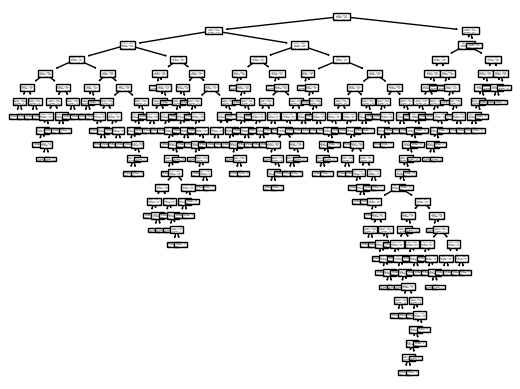

In [9]:
#Plot the Decision Tree using the plot_tree function from the sklearn.tree module
tree.plot_tree(Classifier)

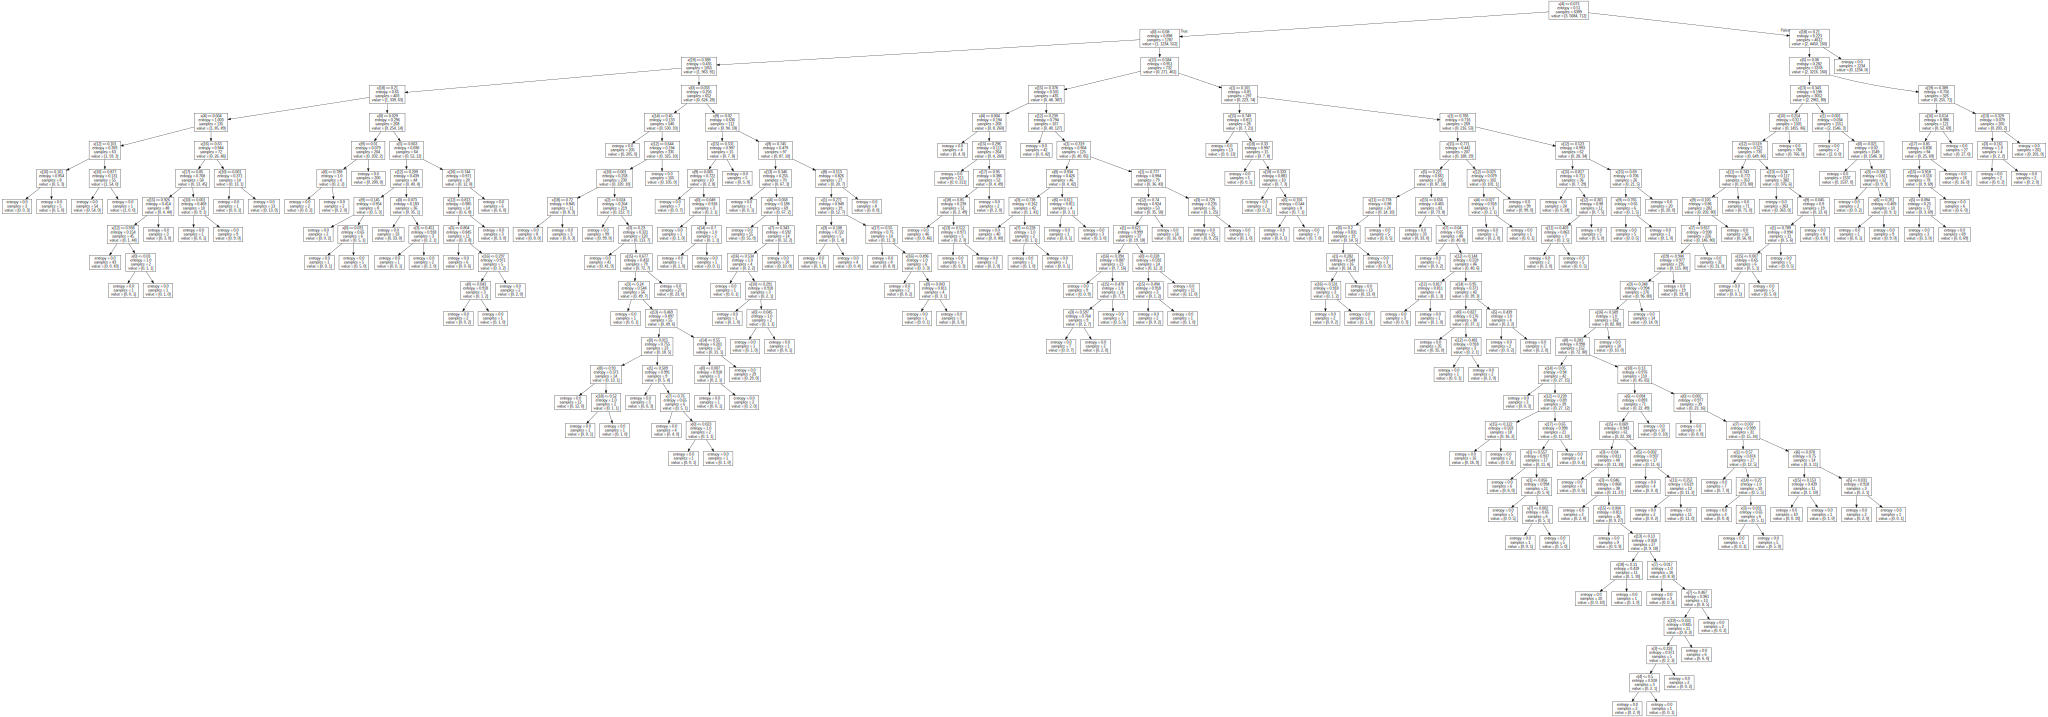

In [10]:
#Import the graphviz library for visualizing the Decision Tree
import graphviz

# Export the Decision Tree in the DOT format using the export_graphviz function
dot_data = tree.export_graphviz(Classifier, out_file=None)

#Create a graphviz Source object from the DOT data
graph = graphviz.Source(dot_data)
graph

# **Neural Network**

Epoch 1/30
160/160 [==============================] - 2s 4ms/step - loss: -3.7419 - accuracy: 0.8472 - val_loss: -15.3635 - val_accuracy: 0.8984
Epoch 2/30
160/160 [==============================] - 0s 2ms/step - loss: -92.3210 - accuracy: 0.8857 - val_loss: -195.1697 - val_accuracy: 0.8984
Epoch 3/30
160/160 [==============================] - 0s 2ms/step - loss: -504.9590 - accuracy: 0.8857 - val_loss: -783.3553 - val_accuracy: 0.8984
Epoch 4/30
160/160 [==============================] - 0s 2ms/step - loss: -1514.8420 - accuracy: 0.8857 - val_loss: -1980.3477 - val_accuracy: 0.8984
Epoch 5/30
160/160 [==============================] - 0s 2ms/step - loss: -3272.6033 - accuracy: 0.8857 - val_loss: -3909.0220 - val_accuracy: 0.8984
Epoch 6/30
160/160 [==============================] - 1s 4ms/step - loss: -5935.8501 - accuracy: 0.8857 - val_loss: -6701.8345 - val_accuracy: 0.8984
Epoch 7/30
160/160 [==============================] - 1s 3ms/step - loss: -9679.0234 - accuracy: 0.8857 - val_

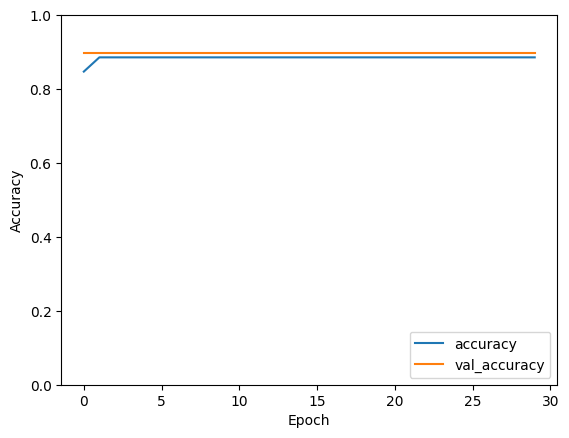

In [11]:
#Import the necessary libraries from TensorFlow and Keras
from tensorflow import keras
from keras import layers,models
from sklearn.metrics import roc_curve, auc

#Create a sequential model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), #Input layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'), #Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')]) #Output layer with 1 neuron and sigmoid activation (binary classification)

#Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train the model with training data, validation split, and specified epochs and batch size
md =model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=30, batch_size=32)

#Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

#Make predictions on the test data
y_pred = model.predict(X_test_scaled)
y_scores = classifier.predict_proba(X_test_scaled)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

#Print the evaluation metrics for the Neural Network
print(f"Neural Network Accuracy: {accuracy}")
print(f"Neural Network AUC Score: {roc_auc}")
print(f"Neural Network Precision Score: {precision_score(Y_test, y_pred, average='weighted', labels=np.unique(y_pred))}")
print(f"Neural Network Recall Score: {recall_score(Y_test, y_pred, average='weighted')}")
print(f"Neural Network F1 Score: {f1_score(Y_test, y_pred, average='weighted', labels=np.unique(y_pred))}")

#Plot the training and validation accuracy over epochs
plt.plot(md.history['accuracy'], label='accuracy')
plt.plot(md.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Support vector machine**

Support vector machine Accuracy: 0.9375
Support vector machine AUC Score: 0.8228571428571428
Support vector machine Precision Score: 0.9539106145251397
Support vector machine Recall Score: 0.9757142857142858
Support vector machine F1 Score: 0.9646892655367232


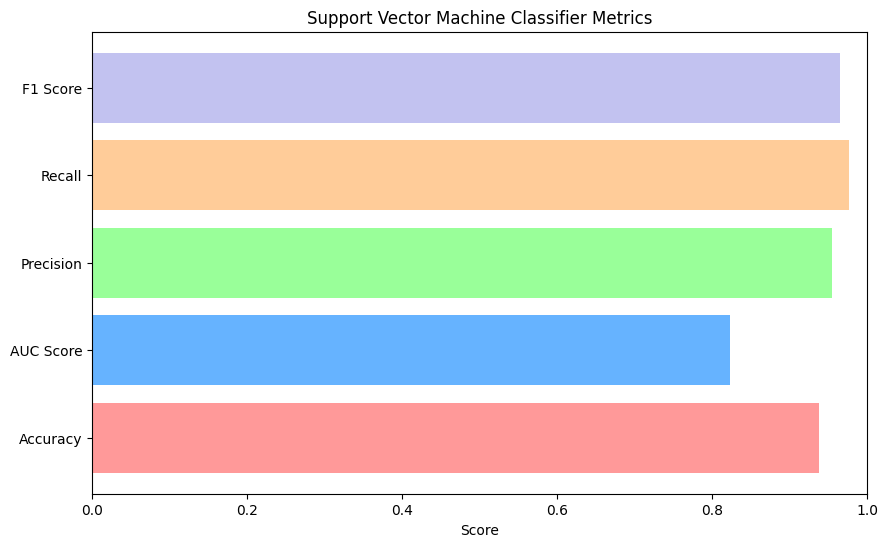

In [12]:
#Import the SVC (Support Vector Classifier) class from sklearn.svm
from sklearn.svm import SVC

#Create an SVC model with a rbf kernel, C=1000 and gamma=0.10000
svm_model = SVC(kernel='rbf', C=1000, gamma=0.10000)

#Train the SVC model on the training data
svm_model.fit(X_train_scaled, Y_train)

#Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

#Calculate the evaluation metrics for the SVC model
SVC_accuracy = accuracy_score(Y_test, y_pred)
SVC_auc_score = roc_auc_score(Y_test, y_pred)
SVC_precision = precision_score(Y_test, y_pred)
SVC_recall = recall_score(Y_test, y_pred)
SVC_f1 = f1_score(Y_test, y_pred)

#Print the evaluation metrics for the SVC model
print(f"Support vector machine Accuracy: {SVC_accuracy}")
print(f"Support vector machine AUC Score: {SVC_auc_score}")
print(f"Support vector machine Precision Score: {SVC_precision}")
print(f"Support vector machine Recall Score: {SVC_recall}")
print(f"Support vector machine F1 Score: {SVC_f1}")

#Create a list of metric names
metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score']

#Create a list of corresponding metric values for the SVC model
values = [SVC_accuracy, SVC_auc_score, SVC_precision, SVC_recall, SVC_f1]

plt.figure(figsize=(10, 6))

# Create a horizontal bar plot with the metrics on the y-axis and their corresponding values on the x-axis
# Each bar is colored differently for better visualization
plt.barh(metrics, values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.xlabel('Score')
plt.title('Support Vector Machine Classifier Metrics')
plt.xlim(0.0, 1.0)  # Set x-axis limits between 0 and 1
plt.show()